this link was useful to me to do this project

https://pawanccs19.medium.com/handwritten-digit-recognition-in-python-using-scikit-learn-fd7147e01149
https://ishika-tailor.medium.com/handwritten-digit-recognition-on-mnist-dataset-61b8d6a884b8
https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b
https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
https://scikit-learn.org/stable/modules/svm.html
https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b
https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
https://medium.com/swlh/how-to-create-an-auc-roc-plot-for-a-multiclass-model-9e13838dd3de
https://gist.github.com/matsub/206a1dac75093d74d8ae2ab9c5a2ae35

I use joblib to save my model to don't need train it again in another time

In [22]:
import joblib

At first, I downloaded the binary file of mnist from yanna.lecun.com then I put them in file samples near my main code .
Because I need to use this binary file I use library of mnist to load data and I change data in array form of numpy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST

mndata = MNIST('samples')
images_train, labels_train = mndata.load_training()
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test, labels_test = mndata.load_testing()
images_test = np.array(images_test)
labels_test = np.array(labels_test)

In [2]:
import os
import struct


class Image:
    def __init__(self, dir='./'):
        self.train_files = {
                'images': os.path.join(dir, 'train-images-idx3-ubyte'),
                'labels': os.path.join(dir, 'train-labels-idx1-ubyte')
                }
        self.test_files = {
                'images': os.path.join(dir, 't10k-images-idx3-ubyte'),
                'labels': os.path.join(dir, 't10k-labels-idx1-ubyte')
                }

    @property
    def train(self):
        path = self.train_files
        return self._get_dataset(path)

    @property
    def test(self):
        path = self.test_files
        return self._get_dataset(path)

    def _get_dataset(self, path):
        images = self._load_images(path['images'])
        labels = self._load_labels(path['labels'])
        for image, label in zip(images, labels):
            yield image, label

    def _load_images(self, fname):
        f = open(fname, 'rb')
        header = struct.unpack('>4i', f.read(16))
        magic, size, width, height = header

        if magic != 2051:
            raise RuntimeError("'%s' is not an MNIST image set." % fname)

        chunk = width * height
        for _ in range(size):
            img = struct.unpack('>%dB' % chunk, f.read(chunk))
            yield img, width, height

        f.close()

    def _load_labels(self, fname):
        f = open(fname, 'rb')
        header = struct.unpack('>2i', f.read(8))
        magic, size = header

        if magic != 2049:
            raise RuntimeError("'%s' is not an MNIST label set." % fname)

        for label in struct.unpack('>%dB' % size, f.read()):
            yield label

        f.close()


def return_data_set(name):

        dataset = Image(name)
        img_train_list = []
        label_train_list = []
        for (img, width, height), label in dataset.train:

            img_train_list.append(img)
            label_train_list.append(label)


        img_test_list = []
        label_test_list = []
        for (img, width, height), label in dataset.test:


            img_test_list.append(img)
            label_test_list.append(label)

        return (img_train_list,label_train_list,img_test_list,label_test_list)

In [3]:
img_train_list,label_train_list,img_test_list,label_test_list = return_data_set('samples')

images_train = np.array(img_train_list)
labels_train = np.array(label_train_list)
images_test = np.array(img_test_list)
labels_test = np.array(label_test_list)

See my number of training set data

In [4]:

len(images_train)

60000

See my number of test set data

In [5]:
len(images_test)


10000

See shape of train set

In [6]:
images_train[0].shape

(784,)

In [7]:
images_train.shape


(60000, 784)

In [8]:
labels_train.shape


(60000,)

To see my label of my data and their frequency in set .

In [9]:
unique_elements, counts_elements = np.unique(labels_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]


Use this to see our data form of picture

ValueError: num must be 1 <= num <= 12, not 0

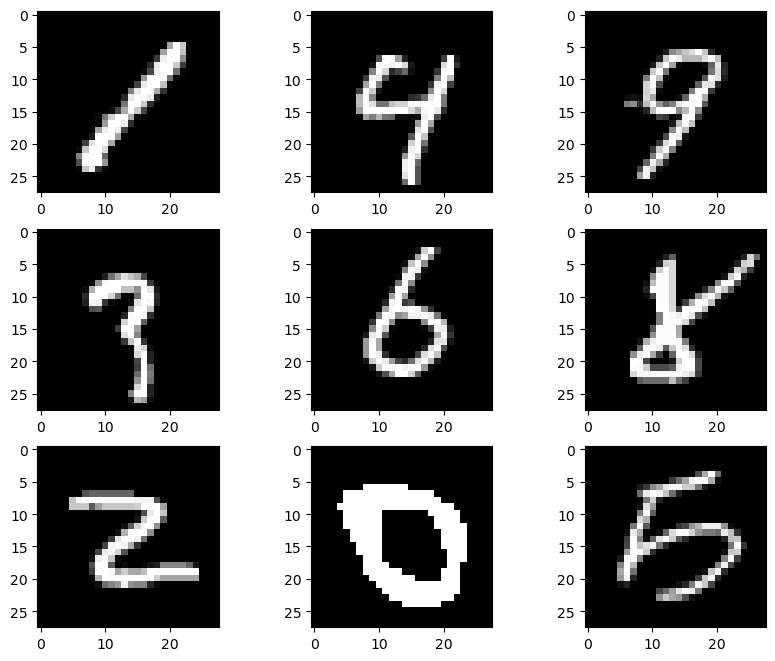

In [10]:
from random import randrange

number_see = []
plt.figure(figsize=(10,8))
i = 0
while i < 10:
    index = randrange(0, len(images_train))  # choose an index ;-)
    if labels_train[index] in number_see:
        pass
    else :
        plt.subplot(330 + 1 + i)
        number_see.append(labels_train[index])
        one_date = images_train[index]
        image = one_date.reshape(28,28)
        i+= 1
        plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()


Use this function to set parameter C and gamma for SVC of sklearn to train data if our function was linear we use LinearSVC because it was faster.

In [1]:
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
def scv_learning_by_C_gamma_func(c,gamma,function,x,y):

    if function == 'linear':
        svm = make_pipeline(StandardScaler(),LinearSVC(C=c,dual=False))
    else:
        svm = make_pipeline(StandardScaler(),SVC(kernel = function, probability=True, gamma=gamma, C=c))
    svm.fit(x,y)
    return svm








With this function I find best gamma and C for one data set .

In [4]:
def find_beest_C_gamma(x_train,y_train,function,x_test,y_test):

    data = []

    best_accuracy = 0
    best_c_gamma = (0,0)
    c_exm = [0.001,0.01,1,10,100]
    gamma = [0.1,1,10]

    for c in c_exm:
        for g in gamma:
            model = scv_learning_by_C_gamma_func(c,g,function, x_train, y_train)
            train_classifier = model.predict(x_train)
            train_accuracy = metrics.accuracy_score(train_classifier,y_train)

            test_classifier = model.predict(x_test)
            test_accuracy = metrics.accuracy_score(test_classifier,y_test)
            data.append({"id":f"C = {c},Gamma = {g}", "training":train_accuracy,"test":test_accuracy})
            print(f"C = {c},Gamma = {g}", f"training {train_accuracy} test: {test_accuracy}")
            if best_accuracy < (train_accuracy+test_accuracy)/2:
                    best_accuracy = (train_accuracy+test_accuracy)/2
                    best_c_gamma = (c,g)


    return [best_c_gamma,best_accuracy,data]


Use find best C if you have default gamma or you use linear function .

In [5]:
def find_best_c(x_train,y_train,function,x_test,y_test,Default_g=1):

    data = []

    best_accuracy = 0
    best_gamma_with_c_one = (0,Default_g)
    c_exm = [0.001,0.01,1,10,100]

    for c in c_exm:

        model = scv_learning_by_C_gamma_func(c,Default_g,function, x_train, y_train)
        train_classifier = model.predict(x_train)
        train_accuracy = metrics.accuracy_score(train_classifier,y_train)

        test_classifier = model.predict(x_test)
        test_accuracy = metrics.accuracy_score(test_classifier,y_test)
        data.append({"id":f"C = {c},Gamma = {Default_g}", "training":train_accuracy,"test":test_accuracy})
        print(f"C = {c},Gamma = {Default_g}", f"training {train_accuracy} test: {test_accuracy}")
        if best_accuracy < (train_accuracy+test_accuracy)/2:
            best_accuracy = (train_accuracy+test_accuracy)/2
            best_gamma_with_c_one = (c,Default_g)


    return [best_gamma_with_c_one,best_accuracy,data]


In [6]:
def find_best_gamma(x_train,y_train,function,x_test,y_test,Default_c=1):
    data = []

    gamma = [0.1,1,10]
    best_accuracy = 0
    best_gamma_with_c_one = (Default_c,0)

    for g in gamma:

        model = scv_learning_by_C_gamma_func(Default_c,g,function, x_train, y_train)
        train_classifier = model.predict(x_train)
        train_accuracy = metrics.accuracy_score(train_classifier,y_train)

        test_classifier = model.predict(x_test)
        test_accuracy = metrics.accuracy_score(test_classifier,y_test)
        data.append({"id":f"C = {Default_c},Gamma = {g}", "training":train_accuracy,"test":test_accuracy})
        print(f"C = {Default_c},Gamma = {g}", f"training {train_accuracy} test: {test_accuracy}")
        if best_accuracy < (train_accuracy+test_accuracy)/2:
            best_accuracy = (train_accuracy+test_accuracy)/2
            best_gamma_with_c_one = (Default_c,g)

    return [best_gamma_with_c_one,best_accuracy,data]


with this function you can give dictionary and make table that show accuracy of training and test .

In [7]:
def make_accuracy_table(dic_data):

    data = [[item['training'],item['test']] for item in dic_data]
    print(data)
    columns = ('training', 'test')
    rows = [item['id'] for item in dic_data]

    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(1, 1)

    axs.axis('tight')
    axs.axis('off')
    the_table = axs.table(cellText=data, colLabels=columns, rowLabels=rows,loc='center')
    plt.show()





With this function you can see the confusion matrix and AUC and RUC and find out perception and recall of your model .
if you have your model you can set only the last one and use your model to find out it's power .

In [33]:
from sklearn import metrics
from yellowbrick.classifier import ROCAUC

def get_details_of_model(c,gamma,function,x_train,y_train,x_test,y_test,name,model=None):
    if model == None:
        svm = scv_learning_by_C_gamma_func(c,gamma,function,x_train,y_train)
    else :
        svm = model
    train_classifier = svm.predict(x_train)
    train_accuracy = metrics.accuracy_score(train_classifier,y_train)

    test_classifier = svm.predict(x_test)
    test_accuracy = metrics.accuracy_score(test_classifier,y_test)

    predicted = svm.predict(x_test)
    print(f"train accuracy {name} = {train_accuracy}")
    print(f"test accuracy {name} = {test_accuracy}")
    print(
    f"Classification report for classifier {svm}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle(f"Confusion Matrix {name}")
    print(f"Confusion matrix {name}:\n{disp.confusion_matrix}")
    plt.show()
    visualizer = ROCAUC(svm, encoder={0: 'zero',
                                        1: 'one',
                                        2: 'two',
                                        3: 'three',
                                        4: 'four',
                                        5: 'five',
                                        6: 'six',
                                        7: 'seven',
                                        8: 'eight',
                                        9: 'nine',
                                        10: 'ten'}, force_model=True)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()



    print("__________________________________________________________________________________________")


If you think you have large model with alot of feature you can reduce your feature with PCA in sklearn.decomposition library

In [9]:
from sklearn.decomposition import PCA


In this example I make 60000,748 matrix to 60000,30 matrix with fewer components

In [27]:
pca_30 = PCA(n_components=30)
all_data = np.concatenate((images_train,images_test))
all_data_pca_30 = pca_30.fit_transform(all_data)

pca_30_feature_training_x = all_data_pca_30[:images_train.shape[0]]
pca_30_feature_test_x = all_data_pca_30[images_train.shape[0]:]
print(pca_30_feature_training_x.shape,pca_30_feature_test_x.shape)

(60000, 30) (10000, 30)


Like above example I reduce it 100 .

In [28]:
pac_100_new = PCA(n_components=100)
all_data = np.concatenate((images_train,images_test))
all_data_pac_100 = pac_100_new.fit_transform(all_data)
pac_100_new_training = all_data_pac_100[:images_train.shape[0]]
pac_100_test_test = all_data_pac_100[images_train.shape[0]:]
print(pac_100_new_training.shape,pac_100_test_test.shape)

(60000, 100) (10000, 100)


In [13]:

Data_svm_Pac_30_rbf = []


create model svm with kernel rbf and use pca 30 and gamma 0.1

In [14]:
# SVM with pac 30 rbf gamma = 0.1
res_c_one = scv_learning_by_C_gamma_func(1, 0.1, 'rbf',pca_30_feature_training_x,labels_train)
filename = 'res_c_one_model.sav'
joblib.dump(res_c_one, filename)

['res_c_one_model.sav']

With joblib.Load I can load my model if in accident I lose the model or I need to use my model in another day

predict accuracy of pca 30 rbf


In [ ]:
classifier_prediction_one = res_c_one.predict(pca_30_feature_test_x)
test_accuracy_one = metrics.accuracy_score(classifier_prediction_one,labels_test)
classifier_prediction_train_one = res_c_one.predict(pca_30_feature_training_x)
train_accuracy_one = metrics.accuracy_score(classifier_prediction_train_one,labels_train)

Data_svm_Pac_30_rbf.append({"id":f"C = {1},Gamma = {0.1}", "training":train_accuracy_one,"test":test_accuracy_one})


filename = 'res_accuracy_one'
joblib.dump(Data_svm_Pac_30_rbf,filename)

In [24]:
res_c_one = joblib.load('res_c_one_model.sav')

create model svm with kernel rbf and use pca 30 and gamma 1 and c 1

In [15]:
# SVM with pac 30 rbf gamma = 1
res_c_two = scv_learning_by_C_gamma_func(1, 1, 'rbf',pca_30_feature_training_x,labels_train)
filename = 'res_c_two_model.sav'
joblib.dump(res_c_two, filename)

['res_c_two_model.sav']

In [ ]:
res_c_two = joblib.load('res_c_two_model.sav')

In [ ]:
train_classifier_two = res_c_two.predict(pca_30_feature_training_x)
train_accuracy_two = metrics.accuracy_score(train_classifier_two,labels_train)
test_classifier_two = res_c_two.predict(pca_30_feature_test_x)
test_accuracy_two = metrics.accuracy_score(test_classifier_two,labels_test)
Data_svm_Pac_30_rbf.append({"id":f"C = {1},Gamma = {1}", "training":train_accuracy_two,"test":test_accuracy_two})

filename = 'res_accuracy_two'
joblib.dump(Data_svm_Pac_30_rbf,filename)


In [ ]:
Data_svm_Pac_30_rbf = joblib.load('res_accuracy_two')
print(Data_svm_Pac_30_rbf)

create model svm with kernel rbf and use pca 30 and gamma 10 and c 1


In [17]:
# SVM with pac 30 rbf gamma = 10

res_c_three = scv_learning_by_C_gamma_func(1, 10, 'rbf',pca_30_feature_training_x,labels_train)
filename = 'res_c_three_model.sav'
joblib.dump(res_c_three,filename)


['res_c_three_model.sav']

In [21]:
train_classifier_three = res_c_three.predict(pca_30_feature_training_x)
train_accuracy_three_ = metrics.accuracy_score(train_classifier_three,labels_train)

test_classifier_three = res_c_three.predict(pca_30_feature_test_x)
test_accuracy_three = metrics.accuracy_score(test_classifier_three,labels_test)
Data_svm_Pac_30_rbf.append({"id":f"C = {1},Gamma = {10}", "training":train_accuracy_three_,"test":test_accuracy_three})
filename = 'res_accuracy_three'
joblib.dump(Data_svm_Pac_30_rbf,filename)

['res_accuracy_one']

In [25]:
res_c_three = joblib.load('res_c_three_model.sav')

predict accuracy of pca 30 rbf with gamma 10 and c 1

In [26]:
train_classifier_three = res_c_three.predict(pca_30_feature_training_x)
train_accuracy_three_ = metrics.accuracy_score(train_classifier_three,labels_train)

test_classifier_three = res_c_three.predict(pca_30_feature_test_x)
test_accuracy_three = metrics.accuracy_score(test_classifier_three,labels_test)
Data_svm_Pac_30_rbf.append({"id":f"C = {1},Gamma = {10}", "training":train_accuracy_three_,"test":test_accuracy_three})
filename = 'res_accuracy_three'
joblib.dump(Data_svm_Pac_30_rbf,filename)


['res_accuracy_three']

[[0.9983, 0.9831], [1.0, 0.314], [1.0, 0.1135]]


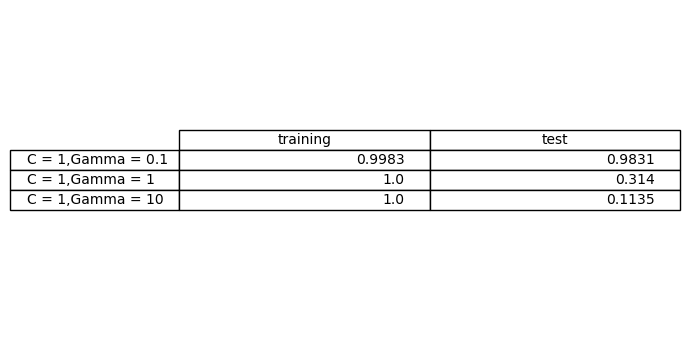

In [27]:
make_accuracy_table(Data_svm_Pac_30_rbf)

with this function I find best C with linear function

In [12]:
best_linear_pac_30 = find_best_c(pca_30_feature_training_x,labels_train,'linear',pca_30_feature_test_x,labels_test,1)


C = 0.001,Gamma = 1 training 0.8637166666666667 test: 0.8735
C = 0.01,Gamma = 1 training 0.87405 test: 0.8823
C = 1,Gamma = 1 training 0.8764166666666666 test: 0.884
C = 10,Gamma = 1 training 0.8764666666666666 test: 0.884
C = 100,Gamma = 1 training 0.8764833333333333 test: 0.884


[[0.8637166666666667, 0.8735], [0.87405, 0.8823], [0.8764166666666666, 0.884], [0.8764666666666666, 0.884], [0.8764833333333333, 0.884]]


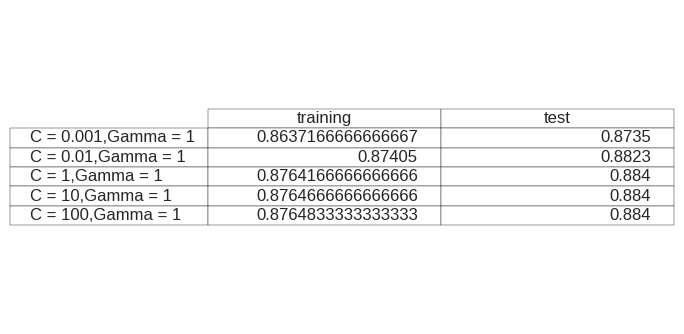

In [13]:
make_accuracy_table(best_linear_pac_30[-1])


I learn data with svm use crammer singer

In [20]:
model_pac_100_with_crammer = make_pipeline(StandardScaler(),LinearSVC(C=1,multi_class='crammer_singer'))
model_pac_100_with_crammer.fit(pac_100_new_training,labels_train)
filename = 'model_pac_100_with_crammer'
joblib.dump(model_pac_100_with_crammer,filename)

['model_pac_100_with_crammer']

get details of model pca 100 with c = 1

train accuracy linear with pac 100 and c 1 with crammer = 0.9216333333333333
test accuracy linear with pac 100 and c 1 with crammer = 0.9239
Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, multi_class='crammer_singer'))]):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.92      0.92       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      

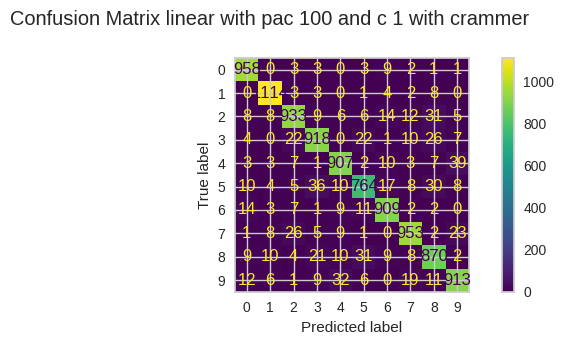

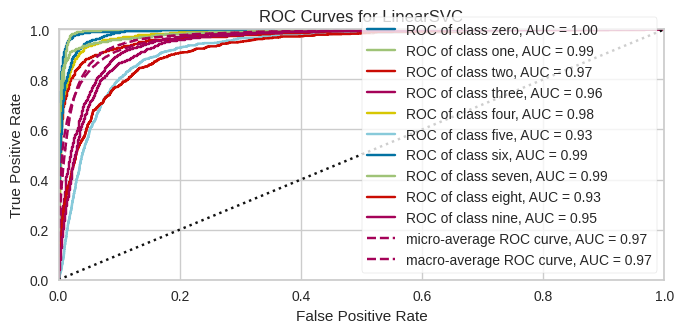

__________________________________________________________________________________________


In [38]:
model_pac_100_with_crammer = joblib.load('model_pca_100_with_crammer')
get_details_of_model(1,1,'none',pac_100_new_training,labels_train,pac_100_test_test,labels_test,'linear with pca 100 and c 1 with crammer',model_pac_100_with_crammer)


I learn data with svm use OVR ( one vs all ) with c = 1

In [15]:
model_pca_100_OVR = make_pipeline(StandardScaler(),LinearSVC(C=1,dual=False))
model_pca_100_OVR.fit(pac_100_new_training,labels_train)
filename = 'model_pca_100_with_OVR.sav'
joblib.dump(model_pca_100_OVR,filename)

['model_pca_100_with_OVR.sav']

get details of model pca 100 with c = 1 ( one vs all )

train accuracy linear with pca 100 and c 1 OVR = 0.909
test accuracy linear with pca 100 and c 1 OVR = 0.9136
Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False))]):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.91      0.92      0.91       982
           5       0.89      0.84      0.87       892
           6       0.92      0.96      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.85      0.86       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91 

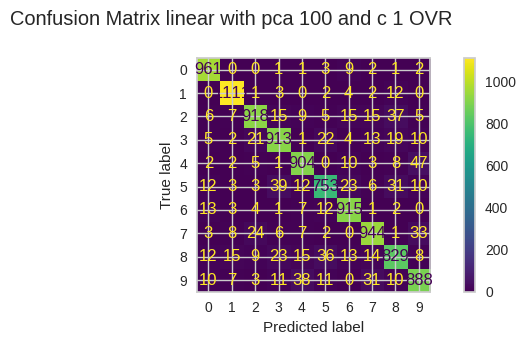

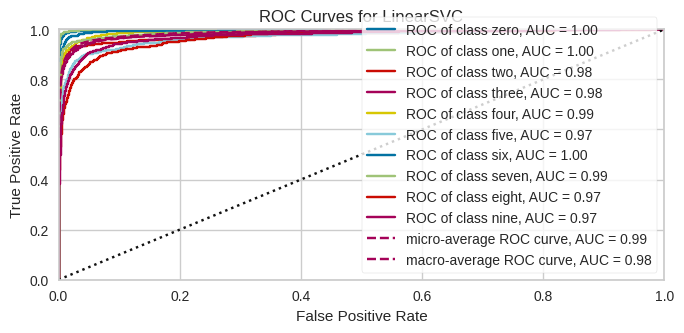

__________________________________________________________________________________________


In [18]:
model_pca_100_with_OVR = joblib.load('model_pca_100_with_OVR.sav')
get_details_of_model(1,1,'none',pac_100_new_training,labels_train,pac_100_test_test,labels_test,'linear with pca 100 and c 1 OVR',model_pca_100_with_OVR)

get details of linear svm without pac (complete data ) with c = 1

/home/mehxi/anaconda3/envs/handwritten_digits/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train accuracy linear without pca with c = 1 = 0.9275166666666667
test accuracy linear without pca with c = 1 = 0.9156
Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False))]):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.86      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92  

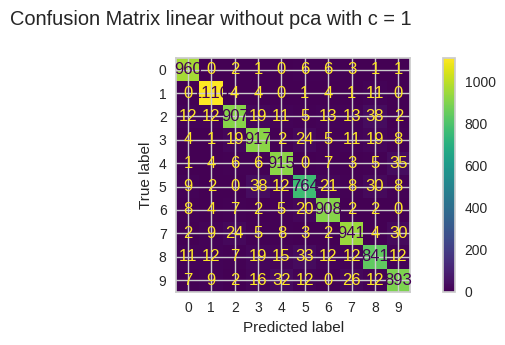

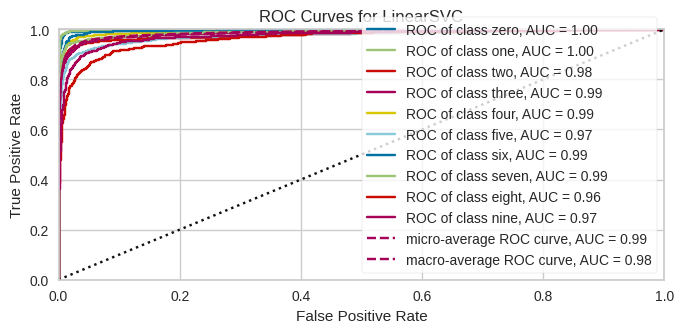

__________________________________________________________________________________________


In [35]:
get_details_of_model(1,1,'linear',images_train,labels_train,images_test,labels_test,'linear without pca with c = 1')

get details of linear svm with pac 30 with c = 1


train accuracy linear with pca 30 with c = 1 = 0.8766
test accuracy linear with pca 30 with c = 1 = 0.884
Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False))]):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       980
           1       0.95      0.98      0.96      1135
           2       0.89      0.84      0.87      1032
           3       0.86      0.87      0.86      1010
           4       0.86      0.90      0.88       982
           5       0.83      0.77      0.80       892
           6       0.91      0.93      0.92       958
           7       0.90      0.90      0.90      1028
           8       0.85      0.83      0.84       974
           9       0.85      0.82      0.83      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88     

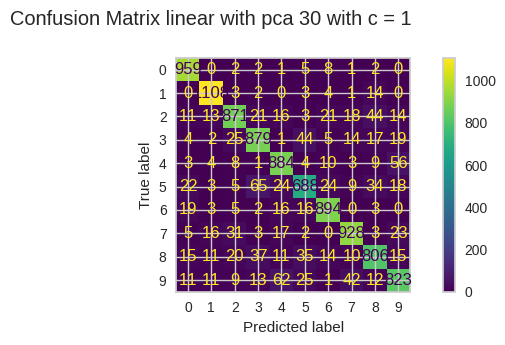

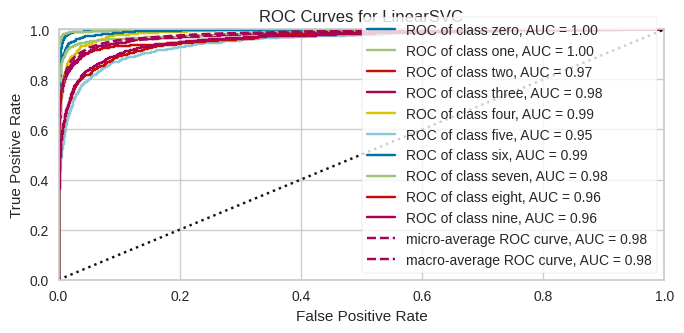

__________________________________________________________________________________________


In [34]:
get_details_of_model(1,1,'linear',pca_30_feature_training_x,labels_train,pca_30_feature_test_x,labels_test,'linear with pca 30 with c = 1')


In [36]:
rbf_30_pac = joblib.load('res_c_one_model.sav')

get details of model rbf in svm with pca 30

train accuracy rbf without pca with gamma 1 and c 1 = 0.9982833333333333
test accuracy rbf without pca with gamma 1 and c 1 = 0.9831
Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=0.1, probability=True))]):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weight

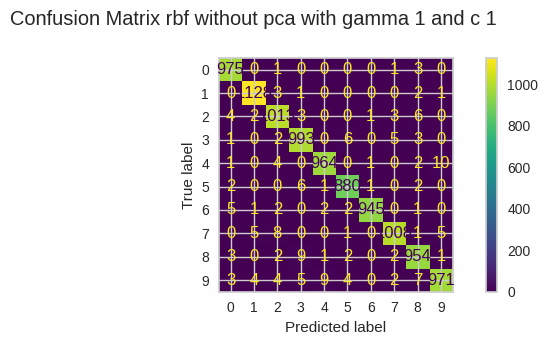

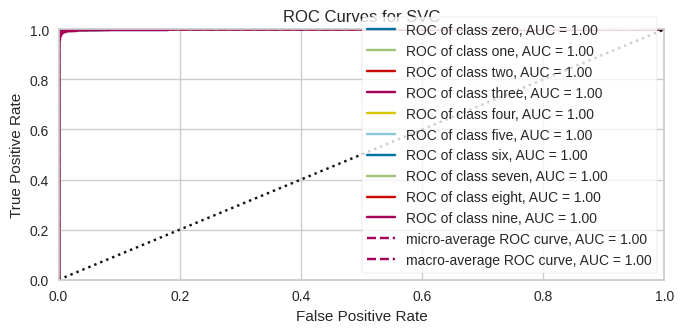

__________________________________________________________________________________________


In [37]:
get_details_of_model(1,0.1,'rbf',pca_30_feature_training_x,labels_train,pca_30_feature_test_x,labels_test,'rbf without pca with gamma 1 and c 1',rbf_30_pac)
